# Fin Loading Analysis

This notebook is meant to estimate the loading we may expect on the LV3 fins. Currently, it assumes a constant lifting pressure on the fins. This is used to find the ratio of shear to bending at the root of the fin. With that information, we can find the length at which a point load should be applied in order to simulate the real loading at the root of the fin. This is needed to test the strength of whatever design is used to attach the fins to LV3.

I would have (still would) liked to find some more detailed information on the kinds of loading we can expect on the LV3 fins. (Need at least an estimate of average pressure to figure out our factor of safety.) [This random course worksheet from MIT][MITbending] seems to suggest that it's reasonable to assume a constant lifting pressure on wings, so I'm assuming a constant lifting pressure on the fins. However, I still don't know what kind of *magnitude* we can expect for that pressure. 

[MITbending]: https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-01-unified-engineering-i-ii-iii-iv-fall-2005-spring-2006/systems-labs-06/spl10.pdf

## Nomenclature

variable | math symbol | name/description | units
---|---|---|---
y  | $y$ | span-wise coordinate (distance from the root) | inches
q  | $q$ | beam loading (shear force per length) | $lb_f/in$
c  | $c$ | chord (distance from leading to trailing edge at some $y$) | inches
F  | $F$ | shear force | pounds
M  | $M$ | bending moment | $lb_f in$
cr  | $C_r$ | exposed root chord | inches
ct  | $C_t$ | tip chord | inches
bst  | $b^*$ | exposed span (a single fin is $b^*/2$ tall) | inches
kq  | $k_q$ | $q$ fudge factor (average lifting pressure) | $lb_f/in^2$
kF  | $k_F$ | $F$ integration constant (root shear) | $lb_f$
kM | $k_M$ | $M$ integration constant (root bending) | $lb_f in$

## Governing equations
* $q=k_q c$ constant lifting pressure  
* $F= \int_0^{b^*/2}q \, dy$  
* BC1: $F=0$ when $y=b^*/2$ (Euler bending)  
* $M= \int_0^{b^*/2}F \, dy$  
* BC2: $M=0$ when $y=b^*/2$ (Euler bending)

## Calculation
### setup environment and parameters

In [1]:
from sympy import *
init_printing()
%matplotlib inline
y, q, c, F, M, cr, ct, bst, kq, kF, kM = symbols('y q c F M cr ct bst kq kF kM')
c = cr + y*(cr+ct)/(bst/2) # define chord as a function of y
q = kq*c # constant lifting pressure
LV3parms = {cr: 18, ct: 5, kq: 1, bst: 6.42*2} # in, in, lbf/in^2, in; parameters for LV3 fins

### find shear

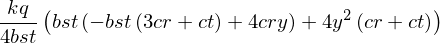

In [2]:
F = integrate(q, y) +kF
kF = solve(F.subs({y: bst/2}), kF)[0] # BC: F=0 when y=bst/2
F = integrate(q, y) +kF # plug back into F
simplify(F)

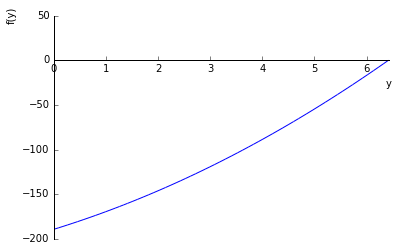

In [3]:
plot(F.subs(LV3parms), (y, 0, LV3parms[bst]/2))

In [4]:
root_shear = lambdify(y, F.subs(LV3parms))(0)
root_shear

### find bending

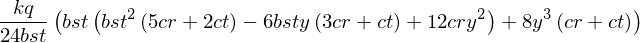

In [5]:
M = integrate(F, y) +kM
kM = solve(M.subs({y: bst/2}), kM)[0] # BC: M=0 when y=bst/2
M = integrate(F, y) +kM # plug back into M
simplify(M)

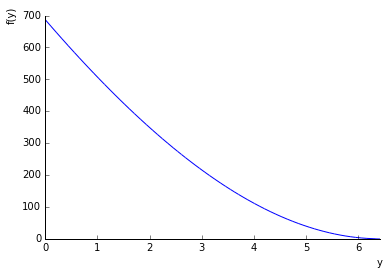

In [6]:
plot(M.subs(LV3parms), (y, 0, LV3parms[bst]/2))

In [7]:
root_bending = lambdify(y, M.subs(LV3parms))(0)
root_bending

### find point load location

When testing lateral the strength of the fins, we will apply a point load to an aluminum beam attached to a module. If we vary the location of that point load, we vary the ratio of shear and bending at the root of that beam. That ratio needs to match that of the real LV3 fins in order for the test to be meaningful. 

For a point load $F$ applied at span $y_*$:  
$M=y_* F$.  
So, we get the location of the point load by taking the ratio of the root bending and root shear:

In [8]:
root_bending/root_shear

So, the point load should be applied 3+5/8 inches away from the root.